# B240921 - Individual Project

### Business Question

Which country has the highest hotel booking potential, and what patterns can enhance customer attraction and retention?

## Python Code

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Uploading file
df = pd.read_csv('hotel_bookings.csv')

In [3]:
# Viewing data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0.0,342.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0.0,737.0,2015.0,July,27.0,1.0,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0.0,7.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0.0,13.0,2015.0,July,27.0,1.0,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0.0,14.0,2015.0,July,27.0,1.0,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [5]:
'agen' in df.columns

False

In [7]:
# ============== TOP 5 COUNTRIES BOOKINGS & CANCELLATIONS ==============


# CANCELLATIONS

# Filter data by agents
df_cancel = df_cancel[df_cancel['agent'].notnull()].copy()

# Separate canceled and not canceled reservations
df_no_cancel = df[df['is_canceled'] == 0]
df_cancel = df[df['is_canceled'] == 1]

# Separating data (by monthly average)
monthly_avg_cancellations = df_cancel.groupby(['arrival_date_month', 'country']).size().groupby('country').mean()
top_countries_cancellations = monthly_avg_cancellations.nlargest(5).rename('Avg. Monthly Cancellations')


# COUNTRIES

# Considering countries that do not cancel (by monthly average)
monthly_avg_reservations = df_no_cancel.groupby(['arrival_date_month', 'country']).size().groupby('country').mean()
top_countries_reservations = monthly_avg_reservations.nlargest(5).rename('Avg. Monthly Reservations')

# Combining data and filling blanks
combined_countries = pd.concat(
    [top_countries_reservations, top_countries_cancellations], axis = 1
).fillna(0)

In [16]:
combined_countries

,Avg. Monthly Reservations,Avg. Monthly Cancellations
country,,
PRT,1755.416667,2289.666667
GBR,805.333333,204.416667
FRA,706.500000,161.166667
ESP,532.250000,181.166667
DEU,505.583333,0.000000
ITA,0.000000,111.166667


In [9]:
# ============== NON-CANCELLED BOOKINGS BY MARKET SEGMENT (PRT) ==============

'''The top country with more bookings and cancellations was Portugal, seeing a potential in this country to increase the demand and lower cancellations rate. 
The market segment is important in considering which are the people that book and the high demand seasons for each.'''


# Change market segment name to lowercase (avoiding repetititon)
df['market_segment'] = df['market_segment'].str.lower()

# Create lists for month order
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Ensure df_no_cancel is an explicit copy - to avoid getting warnings
df_no_cancel = df_no_cancel.copy()
df_no_cancel['arrival_date_month'] = pd.Categorical(
    df_no_cancel['arrival_date_month'], categories = month_order, ordered = True
)

# Ensure changes to df_cancel directly on its copy
df_cancel = df_cancel.copy()
df_cancel['arrival_date_month'] = pd.Categorical(
    df_cancel['arrival_date_month'], categories = month_order, ordered = True
)

# Data to be used
prt_data = df_no_cancel[df_no_cancel['country'] == 'PRT']
prt_segment_counts = prt_data.groupby(['arrival_date_month', 'market_segment']).size().unstack()

# Joins small market segments for order
small_segments = ['Aviation', 'Complementary']  
prt_segment_counts['Others'] = prt_segment_counts[small_segments].sum(axis = 1)
prt_segment_counts = prt_segment_counts.drop(columns = small_segments) 

/var/folders/vp/67wjpygj1zj828cnrdtypnmr0000gn/T/ipykernel_78794/2091217819.py:30: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prt_segment_counts = prt_data.groupby(['arrival_date_month', 'market_segment']).size().unstack()


In [10]:
# ============== TOP 5 AGENTS WITH MOST/LEAST CANCELLATIONS ==============

'''For further analysis, viewing the agents that get more bookings are important, to give them more allowance.
As well, identifying the cause of cancellations and where is concentrated is key for decreasing them.'''


# Filter data in agents of cancelations
df_cancel = df_cancel[df_cancel['agent'].notnull()].copy()  # Create a copy to prevent warnings
df_cancel = df_cancel[df_cancel['agent'] != 'nan'].copy()  # Filter 'nan' values explicitly

df_cancel['agent'] = df_cancel['agent'].astype(str)  # Format as strings
df_cancel['agent'] = df_cancel['agent'].str.replace(r'\.0$', '', regex = True)  # Erase suffix '.0'

# Ensure table_data_lead_time is initialised
table_data_lead_time = []


# Function to format agent values correctly
def format_agent(agent):
    return str(int(agent)) if isinstance(agent, (int, float)) and not isinstance(agent, bool) else str(agent)

# Filter for Portugal
prt_cancel = df_cancel[df_cancel['country'] == 'PRT']  
prt_no_cancel = df_no_cancel[df_no_cancel['country'] == 'PRT']  

# Identify Top 5 Agents with Most and Least Cancellations (avoiding overlap)
top_agents_most_cancel_prt = prt_cancel.groupby('agent').size().nlargest(5).index  # Top 5 agents with most cancellations
top_agents_least_cancel_prt = prt_no_cancel[~ prt_no_cancel['agent'].isin(top_agents_most_cancel_prt)].groupby('agent').size().nlargest(5).index


# Calculate Average Lead Time for Top Agents
avg_lead_time_most_cancel_prt = prt_cancel[prt_cancel['agent'].isin(top_agents_most_cancel_prt)].groupby('agent')['lead_time'].mean()
avg_lead_time_least_cancel_prt = prt_no_cancel[prt_no_cancel['agent'].isin(top_agents_least_cancel_prt)].groupby('agent')['lead_time'].mean()


# Add data for Most Not-Cancelled Reservations
for idx, agent in enumerate(top_agents_least_cancel_prt):
    group = 'Most Not-Cancelled Reservations' if idx == 0 else ''  # Show group name only for the first row
    table_data_lead_time.append([
        group, 
        format_agent(agent), 
        f"{avg_lead_time_least_cancel_prt.get(agent, 0):.1f} days"
    ])
    
# Add data for Most Cancelled Reservations
for idx, agent in enumerate(top_agents_most_cancel_prt):
    group = 'Most Cancelled Reservations' if idx == 0 else ''  # Show group name only for the first row
    table_data_lead_time.append([
        group, 
        format_agent(agent), 
        f"{avg_lead_time_most_cancel_prt.get(agent, 0):.1f} days"
    ])

In [13]:
# ============== CUSTOMER TYPE DISTRIBUTION ==============

'''Looking deeper into the type of customers that come from Portugal for gathering more insights'''


# Filter Portugal Data
prt_data = df[df['country'] == 'PRT']
customer_type_counts = prt_data['customer_type'].value_counts()

In [14]:
# ============== TRANSIENT CUSTOMERS ==============

'''The most popular type of Portuguese customer is Transient, examinating the booking method allows a higher chance for strenghtening it.'''

# Make a copy to avoid getting a warning
prt_transient = df[(df['country'] == 'PRT') & (df['customer_type'] == 'Transient')].copy()  

# Ensure no data is repeated
prt_transient['distribution_channel'] = prt_transient['distribution_channel'].str.lower()

distribution_channel_counts = prt_transient['distribution_channel'].value_counts()

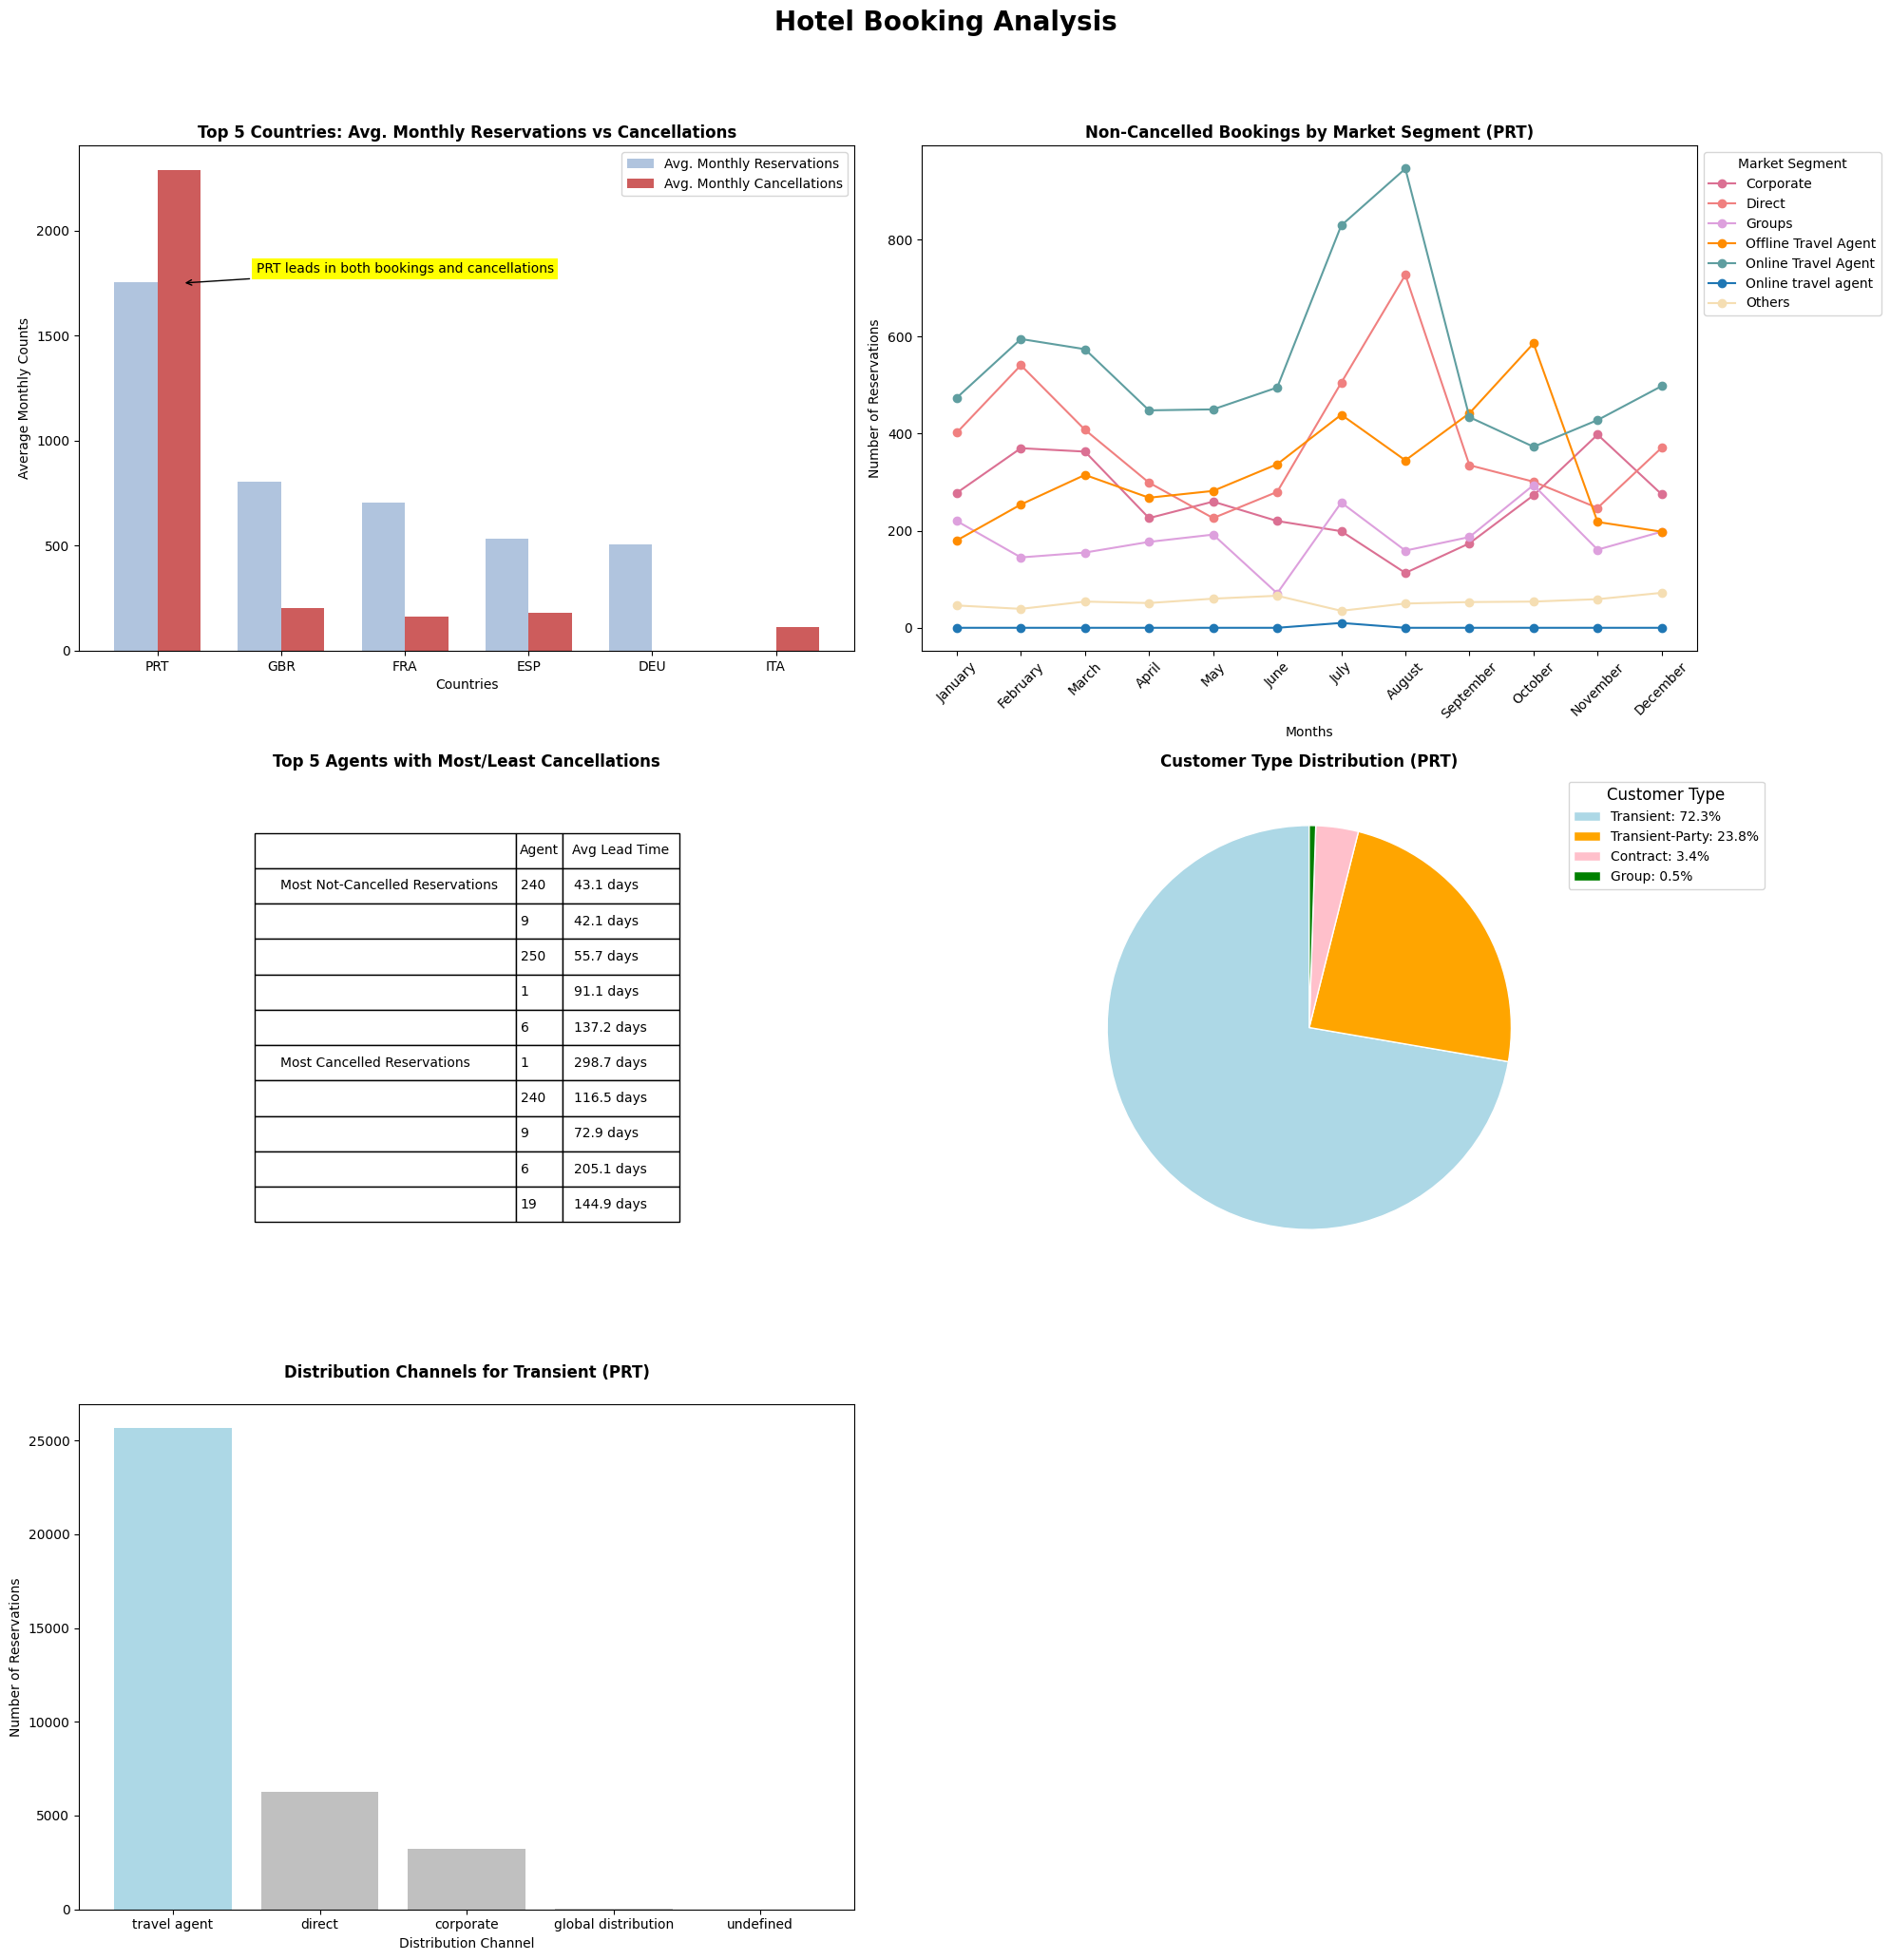

In [15]:
# ============== SUBPLOTS ==============


# Creates subplots
fig,axes = plt.subplots(3, 2, figsize = (20, 21))

# Adds title to subplots
fig.suptitle('Hotel Booking Analysis', fontsize = 20, fontweight = 'bold')



# --------------- TOP 5 COUNTRIES BOOKINGS & CANCELLATIONS ---------------

bar_width = 0.35
x = combined_countries.index
x_indexes = range(len(x))

# Bookings Bar
axes[0, 0].bar(
    [i - bar_width / 2 for i in x_indexes],
    combined_countries['Avg. Monthly Reservations'],
    width = bar_width, color = 'lightsteelblue', label = 'Avg. Monthly Reservations'
)

# Cancellations Bar
axes[0, 0].bar(
    [i + bar_width / 2 for i in x_indexes],
    combined_countries['Avg. Monthly Cancellations'],
    width = bar_width, color = 'indianred', label = 'Avg. Monthly Cancellations'
)

# Format
axes[0, 0].set_title('Top 5 Countries: Avg. Monthly Reservations vs Cancellations', fontweight = 'bold')
axes[0, 0].set_xlabel('Countries')
axes[0, 0].set_ylabel('Average Monthly Counts')
axes[0, 0].set_xticks(x_indexes)
axes[0, 0].set_xticklabels(x)
axes[0, 0].legend()
axes[0, 0].annotate(
    'PRT leads in both bookings and cancellations',
    xy = (0.2, 1750),
    xytext = (2, 1800),
    arrowprops = dict(facecolor = 'black', arrowstyle = '->'),
    fontsize = 10,
    ha = 'center',
    bbox = dict(boxstyle = 'square,pad=0.3', edgecolor = 'black', facecolor = 'yellow', linewidth = 0, linestyle = "-")
)



# --------------- NON-CANCELLED BOOKINGS BY MARKET SEGMENT (PRT) ---------------

# Format colours
custom_colors = {
    'Corporate': 'palevioletred',
    'Direct': 'lightcoral',
    'Groups': 'plum',
    'Offline Travel Agent':'darkorange',
    'Online Travel Agent': 'cadetblue',
    'Others': 'wheat'
}

# Format lines
for segment in prt_segment_counts.columns:
    axes[0, 1].plot(
        prt_segment_counts.index, 
        prt_segment_counts[segment], 
        marker = 'o', 
        label = segment, 
        color = custom_colors.get(segment)
)
        
# Format graph
axes[0, 1].set_title('Non-Cancelled Bookings by Market Segment (PRT)', fontweight = 'bold')
axes[0, 1].set_xlabel('Months')
axes[0, 1].set_ylabel('Number of Reservations')
axes[0, 1].legend(
    title = 'Market Segment', 
    bbox_to_anchor = (1, 1), 
    loc = 'upper left'
)
axes[0, 1].tick_params(axis = 'x', rotation = 45)  # Rotate month labels for better visibility



# --------------- TOP 5 AGENTS WITH MOST/LEAST CANCELLATIONS ---------------

# Turn off subplot space for table (the information gets viewed better this way)
axes[1, 0].axis('off')

# Create the table
lead_time_table = axes [1, 0].table(
    cellText = table_data_lead_time,
    colLabels = ['', 'Agent', 'Avg Lead Time'],
    loc = 'center',
    cellLoc = 'left'
)

# Formatting the table
lead_time_table.scale(1,2)
lead_time_table.auto_set_font_size(False)
lead_time_table.set_fontsize(10)
lead_time_table.auto_set_column_width([0, 1, 2])
axes[1, 0].set_title('Top 5 Agents with Most/Least Cancellations', fontweight = 'bold')



# --------------- CUSTOMER TYPE DISTRIBUTION ---------------

# Create graph - not showing labels
wedges, _ = axes[1, 1].pie(
    customer_type_counts.values,                
    startangle = 90,                              
    labeldistance = 0, 
    colors = ['lightblue', 'orange', 'pink', 'green'],                
    wedgeprops = {'linewidth': 1, 'edgecolor': 'white'}
)

# Creating a list for percetages and customer types 
percentage_labels = [f"{label}: {value / sum(customer_type_counts.values) * 100:.1f}%" 
                     for label, value in zip(customer_type_counts.index, customer_type_counts.values)]

# Adding leyend & title
axes[1, 1].legend(percentage_labels, loc = "upper left", fontsize = 10, title = "Customer Type", title_fontsize = 12, bbox_to_anchor = (1, 1))
axes[1, 1].set_title('Customer Type Distribution (PRT)', loc = 'center', fontweight = 'bold')


# --------------- TRANSIENT CUSTOMERS ---------------

axes[2, 0].bar(distribution_channel_counts.index, distribution_channel_counts.values, color = ['lightblue', 'silver', 'silver', 'silver', 'silver'])
axes[2, 0].set_title('Distribution Channels for Transient (PRT)', pad = 20, fontweight = 'bold')
axes[2, 0].set_xlabel('Distribution Channel')
axes[2, 0].set_ylabel('Number of Reservations')
axes[2, 0].tick_params(axis = 'x')


axes[2, 1].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Mini Report

#### Which country has the highest hotel booking potential, and what patterns can enhance customer attraction and retention?

**Portugal (PRT)** leads in reservations and cancellations, suggesting a high market potential. The data reveals that most bookings come through Online Travel Agents, with peak seasons in **July and August (Summer)**, while corporate bookings surge in **January and February**. Furthermore, the Transient customer segment dominates (72.3%), with minimal representation from Groups and Contract customers. A key insight from the agent analysis shows that those with the highest cancellations have a lead time of over 100 days, while agents with lower cancellations typically have a lead time of less than 100 days, suggesting that long booking windows may contribute to increase cancellations.

To capitalise on this potential, hotels should focus on increasing direct bookings by offering exclusive discounts and loyalty programs. Strengthening relationships with low-cancellation agents and introducing **lead time limits** for all agents could help reduce cancellations and improve revenue stability. Moreover, adjusting policies to **encourage committed reservations** and developing Corporate and Group packages can diversify the customer base. Given the seasonal trends, targeted marketing campaigns should be launched before peak periods, focusing on Online Travel Agents for summer and Corporate clients at the beginning of the year. By implementing these strategies, customers from PRT can improve the hotel's profitability while minimising cancellations.

- A) Good for the business question and the answer. 56
- B) Good for the use of data. 52
- C) Good for the visualization. 53
- D) Good for the code structure. 55

The business question is clearly stated and answered using the data. The use of data can be improved by exploiting it furthe, for example, applying some transformation instead of looking at the simple statitics.

Why the certain features are useful to answer the stated question needs to be addressed more clearly.

In [17]:
import numpy as np

In [20]:
A, B, C, D = 56, 52, 53, 55

print('overall mark: ' + str(np.mean([A, B, C, D])))

overall mark: 54.0
